# Solves the Shallow Ice Approximation 

In [1]:
# Solving the SIA with a spatially-fixed surface mass balance.
import numpy as np
import matplotlib.pyplot as plt

# 1. descritize time
dt = 0.004   # units [years]
T = 1000
t = np.arange(0,T,dt)
Lt = len(t)

# 2. descritize space
dx = 200   # units [m]
X = 40000
x = np.arange(0,X,dx)
Lx = len(x)

# create staggered grid for evaluating flux
x_stag = x[0:-1] + 0.5*dx

# 3. define physical constants
n = 3   # Glen's flow law exponent
A = 24*10**(-25) *(365*24*60*60)   # Glen's flow law parameter original value from Cuffey and Paterson 24e-25
rho = 1000   # ice density
g = 10       # acceleration due to gravity

# bed elevation
# w = 5000
# xp = X/2
# hp = 400
# zb = x*0 + hp*np.exp(-(x-xp)**2/(2*w**2))
# plt.plot(x,zb,'.')
# zb = 1500*(-np.tanh(20*(x-0.75*X)/X))

# 3. numerical constant
e = 0.0001    # used to prevent ice thickness from going to zero, when our model does not apply.

# 4. initial conditions
H = np.zeros((Lt,Lx))

L = X/2
H0 = 1000
H[0,:] = np.maximum(e,H0 - H0*(2*x/L)**2)    # an arbitrary function that obeys our boundary condition (dh/dx = 0 at x = 0)
H_new = np.zeros((Lx))

# 5. surface mass balance
ELx = X/3
b = 1*10**(-4) * (X/3-x)


print_period = 10000
# sampling vector

#sample_period = 10

#t_samp = t[0:-1:sample_period]

#for i, timestep in enumerate(t): 
#    print(f'model time step = {i}')
#    if timestep in t_samp:
#        print(f'sample time = {i}')

print('starting main loop')
# 6. Main loop (evolves the thickness H forward in time)
for i, timestep in enumerate(t):  
    
    if i % print_period == 0:    
        print(f'{timestep} years out of {T} years.')

    # save old thickness vector
    H_old  = H[i-1,:]

    # evaluate H on the staggered grid
    H_stag = (H_old[1:] + H_old[0:-1])/2
 
    # evaluate surface slope on the staggered grid.
    alpha = -(H_old[1:] - H_old[0:-1])/dx # on staggered grid

    # evaluate flux on the staggered grid
    q = 2*A/(n+2) * (rho*g*  alpha)**n * H_stag**(n+2)   # on staggered grid

    # compute the ice thickness using the finite-difference form of the
    # mass conservation equation. 
   

    H_new[1:-1] = np.maximum(e,H_old[1:-1] + dt * ( b[1:-1] - (q[1:]-q[0:-1])/dx ))    
    
    # apply the boundary conditions at x = 0 and x = X
    H_new[0] = H_new[1]
    H_new[-1] = e
    
    # save new thickness vector
    H[i,:] = H_new



starting main loop
0.0 years out of 1000 years.
40.0 years out of 1000 years.
80.0 years out of 1000 years.
120.0 years out of 1000 years.
160.0 years out of 1000 years.
200.0 years out of 1000 years.
240.0 years out of 1000 years.
280.0 years out of 1000 years.
320.0 years out of 1000 years.
360.0 years out of 1000 years.
400.0 years out of 1000 years.
440.0 years out of 1000 years.
480.0 years out of 1000 years.
520.0 years out of 1000 years.
560.0 years out of 1000 years.
600.0 years out of 1000 years.
640.0 years out of 1000 years.
680.0 years out of 1000 years.
720.0 years out of 1000 years.
760.0 years out of 1000 years.
800.0 years out of 1000 years.
840.0 years out of 1000 years.
880.0 years out of 1000 years.
920.0 years out of 1000 years.
960.0 years out of 1000 years.


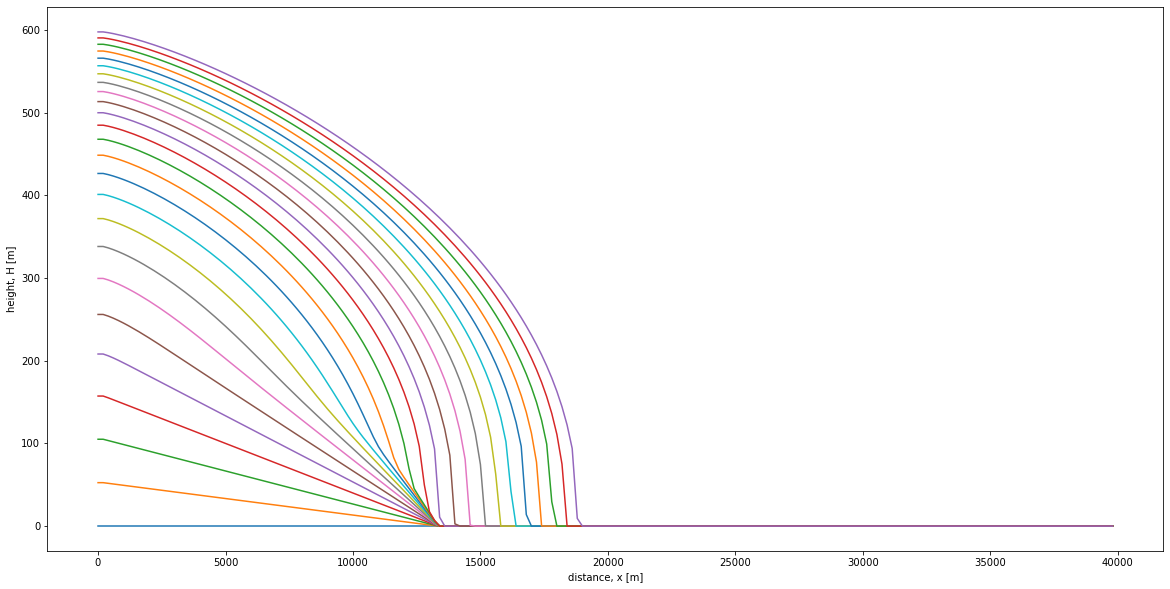

In [2]:
plt.figure(figsize=(20, 10))
plt.plot(x,np.transpose(H[0:-1:10000,:]));
plt.xlabel('distance, x [m]')
plt.ylabel('height, H [m]')
plt.show()


TypeError: 'str' object is not callable

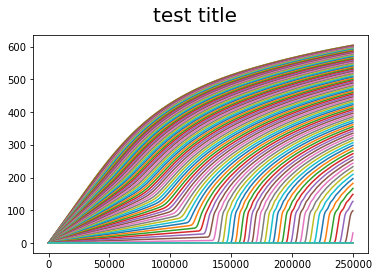

In [10]:
fig = plt.figure()
plt.plot(H)
fig.suptitle('test title', fontsize=20)
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=16)
fig.savefig('test.jpg')